In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

## Introduction

In [2]:
df = pd.read_csv("./data/match-stats/match-stats.csv")
df

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
0,20/11/2022,Qatar,gs1,0,5,0,0.47,434,0.80,15,4,0,3,1,L
1,20/11/2022,Ecuador,gs1,2,6,3,0.53,486,0.84,15,2,0,4,3,W
2,21/11/2022,England,gs1,6,13,7,0.79,797,0.89,9,0,0,2,8,W
3,21/11/2022,Iran,gs1,2,8,3,0.21,215,0.66,14,2,0,2,0,L
4,21/11/2022,Senegal,gs1,0,15,4,0.46,385,0.79,13,2,0,2,6,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,14/12/2022,Semi Finalist 2,SF,0,0,0,0.00,0,0.00,0,0,0,0,0,NaN
122,15/12/2022,Semi Finalist 3,SF,0,0,0,0.00,0,0.00,0,0,0,0,0,NaN
123,15/12/2022,Semi Finalist 4,SF,0,0,0,0.00,0,0.00,0,0,0,0,0,NaN
124,17/12/2022,Finalist 1,Final,0,0,0,0.00,0,0.00,0,0,0,0,0,NaN


In [7]:
#take the data of all full time match

df2 = df[df["matches"].str.contains("gs")]
df2

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
0,20/11/2022,Qatar,gs1,0,5,0,0.47,434,0.80,15,4,0,3,1,L
1,20/11/2022,Ecuador,gs1,2,6,3,0.53,486,0.84,15,2,0,4,3,W
2,21/11/2022,England,gs1,6,13,7,0.79,797,0.89,9,0,0,2,8,W
3,21/11/2022,Iran,gs1,2,8,3,0.21,215,0.66,14,2,0,2,0,L
4,21/11/2022,Senegal,gs1,0,15,4,0.46,385,0.79,13,2,0,2,6,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,02/12/2022,Uruguay,gs3,2,12,7,0.49,433,0.77,11,5,0,2,2,W
92,03/12/2022,Serbia,gs3,2,12,4,0.54,466,0.77,18,7,0,0,2,L
93,03/12/2022,Switzerland,gs3,3,14,7,0.46,415,0.76,14,4,0,0,0,W
94,03/12/2022,Cameroon,gs3,1,7,3,0.35,299,0.77,14,3,1,0,3,W


In [8]:
df2.describe()

,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner
count,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.25000,11.125000,3.833333,0.500000,478.750000,0.804375,11.958333,1.729167,0.020833,1.927083,4.500000
std,1.32982,5.876358,2.602293,0.139488,158.975801,0.068346,4.252347,1.475977,0.143576,1.778496,2.916378
min,0.00000,0.000000,0.000000,0.170000,215.000000,0.570000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,7.000000,2.000000,0.390000,372.250000,0.770000,9.000000,1.000000,0.000000,1.000000,2.000000
50%,1.00000,10.000000,3.000000,0.500000,466.000000,0.820000,12.000000,2.000000,0.000000,1.500000,4.000000
75%,2.00000,13.000000,5.000000,0.610000,551.000000,0.850000,15.000000,2.250000,0.000000,3.000000,6.000000
max,7.00000,32.000000,12.000000,0.830000,1058.000000,0.930000,23.000000,7.000000,1.000000,10.000000,14.000000


In [9]:
#change the result with numbers. L=0, D=1, W=2
result = {"L":0, "D":1, "W":2}
df2.result = [result[item] for item in df2.result]
df2

/tmp/ipykernel_4845/2741338219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.result = [result[item] for item in df2.result]


,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
0,20/11/2022,Qatar,gs1,0,5,0,0.47,434,0.80,15,4,0,3,1,0
1,20/11/2022,Ecuador,gs1,2,6,3,0.53,486,0.84,15,2,0,4,3,2
2,21/11/2022,England,gs1,6,13,7,0.79,797,0.89,9,0,0,2,8,2
3,21/11/2022,Iran,gs1,2,8,3,0.21,215,0.66,14,2,0,2,0,0
4,21/11/2022,Senegal,gs1,0,15,4,0.46,385,0.79,13,2,0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,02/12/2022,Uruguay,gs3,2,12,7,0.49,433,0.77,11,5,0,2,2,2
92,03/12/2022,Serbia,gs3,2,12,4,0.54,466,0.77,18,7,0,0,2,0
93,03/12/2022,Switzerland,gs3,3,14,7,0.46,415,0.76,14,4,0,0,0,2
94,03/12/2022,Cameroon,gs3,1,7,3,0.35,299,0.77,14,3,1,0,3,2


In [10]:
#i want to add the columns that shown up the conceded goals
goals_conceded = []
for i in range(len(df2["goals"])):
    if i%2 == 0:
        goals_conceded.append(df2["goals"][i+1])
    elif i%2 != 0:
        goals_conceded.append(df2["goals"][i-1])
        
goals_conceded

[2,
 0,
 2,
 6,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 4,
 0,
 0,
 2,
 1,
 0,
 7,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 3,
 0,
 2,
 2,
 0,
 3,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 4,
 1,
 1,
 3,
 3,
 3,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 3,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 4,
 2,
 1,
 2,
 2,
 0,
 3,
 2,
 0,
 1]

In [11]:
df2["goals_conceded"] = goals_conceded
df2 = df2.iloc[:,[0,1,2,3,15,4,5,6,7,8,9,10,11,12,13,14]]
df2

/tmp/ipykernel_4845/487502958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["goals_conceded"] = goals_conceded


,date,nationalTeam,matches,goals,goals_conceded,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
0,20/11/2022,Qatar,gs1,0,2,5,0,0.47,434,0.80,15,4,0,3,1,0
1,20/11/2022,Ecuador,gs1,2,0,6,3,0.53,486,0.84,15,2,0,4,3,2
2,21/11/2022,England,gs1,6,2,13,7,0.79,797,0.89,9,0,0,2,8,2
3,21/11/2022,Iran,gs1,2,6,8,3,0.21,215,0.66,14,2,0,2,0,0
4,21/11/2022,Senegal,gs1,0,2,15,4,0.46,385,0.79,13,2,0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,02/12/2022,Uruguay,gs3,2,0,12,7,0.49,433,0.77,11,5,0,2,2,2
92,03/12/2022,Serbia,gs3,2,3,12,4,0.54,466,0.77,18,7,0,0,2,0
93,03/12/2022,Switzerland,gs3,3,2,14,7,0.46,415,0.76,14,4,0,0,0,2
94,03/12/2022,Cameroon,gs3,1,0,7,3,0.35,299,0.77,14,3,1,0,3,2


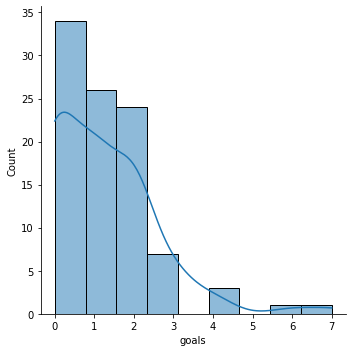

In [13]:
sns.displot(data=df2, x="goals", kde=True)

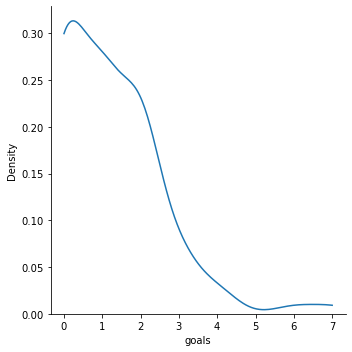

In [14]:
sns.displot(data=df2, x="goals", kind="kde", cut=0)

/tmp/ipykernel_4845/29246795.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr())


<AxesSubplot:>

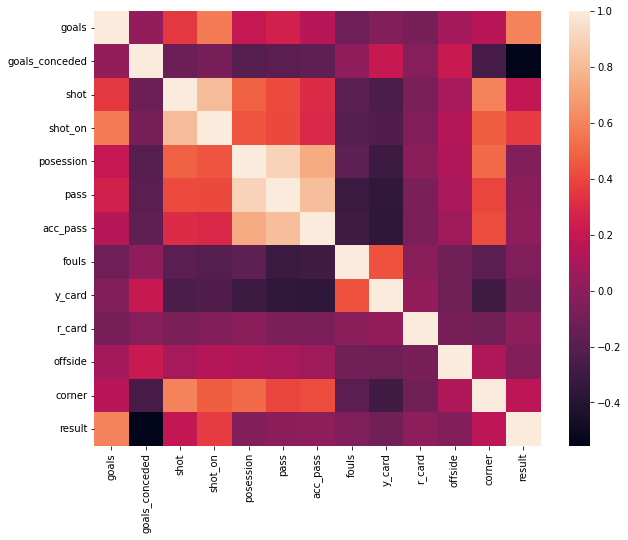

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr())

In [15]:
qualified = ["Netherland", "Senegal", "England", "USA",
                                       "Argentina", "Poland", "France", "Australia",
                                       "Japan", "Spain", "Maroko", "Croatia",
                                       "Brazil", "Switzerland", "Portugal", "Rep. Korea"]
roundof16 = df2[df2["nationalTeam"].isin(qualified)]
roundof16

,date,nationalTeam,matches,goals,goals_conceded,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
2,21/11/2022,England,gs1,6,2,13,7,0.79,797,0.89,9,0,0,2,8,2
4,21/11/2022,Senegal,gs1,0,2,15,4,0.46,385,0.79,13,2,0,2,6,0
5,21/11/2022,Netherland,gs1,2,0,10,3,0.54,436,0.81,13,1,0,1,7,2
6,22/11/2022,USA,gs1,1,1,6,1,0.59,567,0.87,15,4,0,1,5,1
8,22/11/2022,Argentina,gs1,1,2,15,6,0.70,596,0.85,7,0,0,10,9,0
13,22/11/2022,Poland,gs1,0,0,6,2,0.39,322,0.70,15,1,0,0,5,1
14,23/11/2022,France,gs1,4,1,23,7,0.63,723,0.89,5,0,0,0,8,2
15,23/11/2022,Australia,gs1,1,4,4,1,0.37,440,0.83,11,3,0,0,1,0
16,23/11/2022,Maroko,gs1,0,0,8,2,0.35,348,0.78,16,1,0,0,0,1
17,23/11/2022,Croatia,gs1,0,0,5,2,0.65,642,0.85,1,0,0,1,5,1


In [20]:
roundof16_stats = roundof16.groupby("nationalTeam", as_index = False).agg({"goals":["mean"], "goals_conceded":["mean"]})
roundof16_stats.columns = ["nationalTeam", "avg_gls", "avg_gls_con"]
roundof16_stats

,nationalTeam,avg_gls,avg_gls_con
0,Argentina,1.666667,0.666667
1,Australia,1.000000,1.333333
2,Brazil,1.000000,0.333333
3,Croatia,1.333333,0.333333
4,England,3.000000,0.666667
5,France,2.000000,1.000000
6,Japan,1.333333,1.000000
7,Maroko,1.333333,0.333333
8,Netherland,1.666667,0.333333
9,Poland,0.666667,0.666667


In [103]:
roundof16_stats._get_value(roundof16_stats["nationalTeam"]=="Japan", 1, takeable=True)[0]

1.3333333333333333

In [105]:
test = (roundof16_stats._get_value(roundof16_stats["nationalTeam"]=="Japan", 1, takeable=True)[0] * 
        roundof16_stats._get_value(roundof16_stats["nationalTeam"]=="Poland", 2, takeable=True)[0])
test

0.8888888888888888

Text(0.5, 1.0, 'Goals For and Goals Again of Round 16 Contestant')

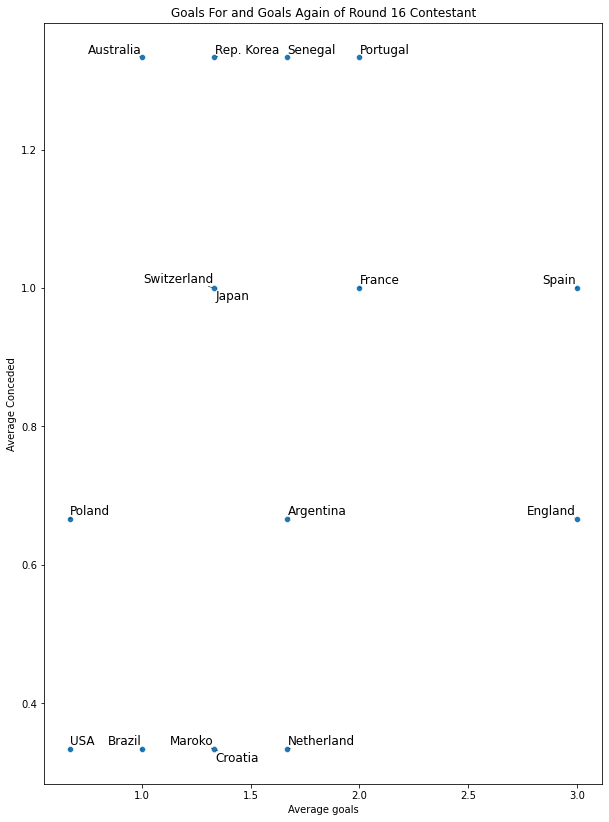

In [21]:
plt.figure(figsize=(10,14))
sns.scatterplot(data=roundof16_stats, x="avg_gls", y="avg_gls_con")
plt.title("Shot On Target and Goals Convertion of Round 16 Contestant")
texts=[]
for x, row in roundof16_stats.iterrows():
    texts.append(plt.text(x=row.avg_gls, y=row.avg_gls_con, s=row.nationalTeam, size=12))

adjust_text(texts,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
plt.xlabel("Average goals")
plt.ylabel("Average Conceded")
plt.title('Goals For and Goals Again of Round 16 Contestant')

In [66]:
knockout_data = df[96:112].copy()
knockout_data

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
96,03/12/2022,Netherland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
97,03/12/2022,USA,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
98,04/12/2022,Argentina,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
99,04/12/2022,Australia,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
100,04/12/2022,France,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
101,04/12/2022,Poland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
102,05/12/2022,England,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
103,05/12/2022,Senegal,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
104,05/12/2022,E First,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
105,05/12/2022,F Runner up,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN


In [47]:
#we have to change the nationalTeam of 104 to 111
national = {"E First":"Japan", "F Runner up" : "Croatia", "G First":"Brazil", "H Runner up":"Rep. Korea", 
            "F First":"Maroko", "E Runner up":"Spain", "H First":"Portugal", "G Runner up":"Switzerland"}
knockout_data2 = knockout_data[8:16].copy()
knockout_data2["nationalTeam"] = knockout_data2["nationalTeam"].map(national)
knockout_data2

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
104,05/12/2022,Japan,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
105,05/12/2022,Croatia,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
106,06/12/2022,Brazil,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
107,06/12/2022,Rep. Korea,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
108,06/12/2022,Maroko,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
109,06/12/2022,Spain,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
110,07/12/2022,Portugal,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
111,07/12/2022,Switzerland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN


In [69]:
knockout_data = knockout_data.iloc[:8]

In [70]:
knockout_data

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
96,03/12/2022,Netherland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
97,03/12/2022,USA,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
98,04/12/2022,Argentina,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
99,04/12/2022,Australia,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
100,04/12/2022,France,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
101,04/12/2022,Poland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
102,05/12/2022,England,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
103,05/12/2022,Senegal,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN


In [71]:
knockout_data = pd.concat([knockout_data,knockout_data2])
knockout_data

,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
96,03/12/2022,Netherland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
97,03/12/2022,USA,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
98,04/12/2022,Argentina,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
99,04/12/2022,Australia,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
100,04/12/2022,France,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
101,04/12/2022,Poland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
102,05/12/2022,England,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
103,05/12/2022,Senegal,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
104,05/12/2022,Japan,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
105,05/12/2022,Croatia,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN


In [73]:
knockout_data = knockout_data.reset_index()
knockout_data

,index,date,nationalTeam,matches,goals,shot,shot_on,posession,pass,acc_pass,fouls,y_card,r_card,offside,corner,result
0,96,03/12/2022,Netherland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
1,97,03/12/2022,USA,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
2,98,04/12/2022,Argentina,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
3,99,04/12/2022,Australia,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
4,100,04/12/2022,France,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
5,101,04/12/2022,Poland,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
6,102,05/12/2022,England,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
7,103,05/12/2022,Senegal,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
8,104,05/12/2022,Japan,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN
9,105,05/12/2022,Croatia,RO16,0,0,0,0.0,0,0.0,0,0,0,0,0,NaN


In [74]:
#i want to add the columns that shown up the conceded goals
home = []
away = []
for i in range(len(knockout_data)):
    if i%2 == 0:
        home.append(knockout_data["nationalTeam"][i])
    elif i%2 != 0:
        away.append(knockout_data["nationalTeam"][i])
        
print("this is the home team: ", home)
print("this is the away team: ", away)

this is the home team:  ['Netherland', 'Argentina', 'France', 'England', 'Japan', 'Brazil', 'Maroko', 'Portugal']
this is the away team:  ['USA', 'Australia', 'Poland', 'Senegal', 'Croatia', 'Rep. Korea', 'Spain', 'Switzerland']


In [76]:
dict_round16 = {"home":home, "away":away}
df_round16 = pd.DataFrame(dict_round16)
df_round16

,home,away
0,Netherland,USA
1,Argentina,Australia
2,France,Poland
3,England,Senegal
4,Japan,Croatia
5,Brazil,Rep. Korea
6,Maroko,Spain
7,Portugal,Switzerland


In [77]:
ro16_matchindex = ["Match 49", "Match 50", "Match 51", "Match 52","Match 53","Match 54", "Match 55", "Match 56"]
ro16_winner = ["?","?","?","?","?","?","?","?"]
df_round16["match"] = ro16_matchindex
df_round16["winner"] = ro16_winner
df_round16

,home,away,match,winner
0,Netherland,USA,Match 49,?
1,Argentina,Australia,Match 50,?
2,France,Poland,Match 51,?
3,England,Senegal,Match 52,?
4,Japan,Croatia,Match 53,?
5,Brazil,Rep. Korea,Match 54,?
6,Maroko,Spain,Match 55,?
7,Portugal,Switzerland,Match 56,?


In [79]:
#oops sorry, i just got the idea to show the probability points of the teams
ro16_homepoint=["?","?","?","?","?","?","?","?"]
ro16_awaypoint = ["?","?","?","?","?","?","?","?"]
df_round16["homepoint"] = ro16_homepoint
df_round16["awaypoint"] = ro16_awaypoint
df_round16 = df_round16.iloc[:,[0,1,2,4,5,3]]
df_round16

,home,away,match,homepoint,awaypoint,winner
0,Netherland,USA,Match 49,?,?,?
1,Argentina,Australia,Match 50,?,?,?
2,France,Poland,Match 51,?,?,?
3,England,Senegal,Match 52,?,?,?
4,Japan,Croatia,Match 53,?,?,?
5,Brazil,Rep. Korea,Match 54,?,?,?
6,Maroko,Spain,Match 55,?,?,?
7,Portugal,Switzerland,Match 56,?,?,?


In [82]:
#make quarter final dataframe
home_qf = ["Winner of Match 53","Winner of Match 49", "Winner of Match 55", "Winner of Match 51"]
away_qf = ["Winner of Match 54", "Winner of Match 50", "Winner of Match 56", "Winner of Match 52"]
qf_matchindex = ["Match 57", "Match 58", "Match 59", "Match 60"]
qf_homepoint = ["?","?","?","?"] 
qf_awaypoint = ["?","?","?","?"]
qf_winner = ["?","?","?","?"]
df_qf = pd.DataFrame({"home":home_qf, 
                     "away":away_qf,
                     "match":qf_matchindex,
                     "homepoint":qf_homepoint,
                     "awaypoint":qf_awaypoint,
                     "winner":qf_winner})
df_qf

,home,away,match,homepoint,awaypoint,winner
0,Winner of Match 53,Winner of Match 54,Match 57,?,?,?
1,Winner of Match 49,Winner of Match 50,Match 58,?,?,?
2,Winner of Match 55,Winner of Match 56,Match 59,?,?,?
3,Winner of Match 51,Winner of Match 52,Match 60,?,?,?


In [83]:
#make semifinal dataframe
home_semifinal = ["Winner of Match 58", "Winner of Match 60"]
away_semifinal = ["Winner of Match 57", "Winner of Match 59"]
semifinal_matchindex = ["Match 61", "Match 62"]
semifinal_homepoint = ["?", "?"]
semifinal_awaypoint = ["?", "?"]
semifinal_winner = ["?", "?"]
df_semifinal = pd.DataFrame({"home":home_semifinal,
                            "away":away_semifinal,
                            "match":semifinal_matchindex,
                            "homepoint":semifinal_homepoint,
                            "awaypoint":semifinal_awaypoint,
                            "winner":semifinal_winner})

df_semifinal

,home,away,match,homepoint,awaypoint,winner
0,Winner of Match 58,Winner of Match 57,Match 61,?,?,?
1,Winner of Match 60,Winner of Match 59,Match 62,?,?,?


In [86]:
#make final dataframe
home_final = ["Winner of Match 61"]
away_final = ["Winner of Match 62"]
final_matchindex = ["Match 63"]
final_homepoint = ["?"]
final_awaypoint = ["?"]
winner = ["?"]
df_final = pd.DataFrame({"home":home_final,
                        "away":away_final,
                        "match":final_matchindex,
                        "homepoint":final_homepoint,
                        "awaypoint":final_awaypoint,
                        "winner":winner})

df_final

,home,away,match,homepoint,awaypoint,winner
0,Winner of Match 61,Winner of Match 62,Match 63,?,?,?


In [87]:
from scipy.stats import poisson

In [117]:
#roundof16_stats.columns = ["nationalTeam", "avg_gls", "avg_gls_con"]
#roundof16_stats._get_value(roundof16_stats["nationalTeam"]=="Japan", 1, takeable=True)[0]

def predict_points(home, away):
    if home in roundof16_stats.nationalTeam.values and away in roundof16_stats.nationalTeam.values:
        lambda_home = (roundof16_stats._get_value(roundof16_stats["nationalTeam"]==home, 1, takeable=True)[0] * 
                       roundof16_stats._get_value(roundof16_stats["nationalTeam"]==away, 2, takeable=True)[0])
        lambda_away = (roundof16_stats._get_value(roundof16_stats["nationalTeam"]==away, 1, takeable=True)[0] * 
                       roundof16_stats._get_value(roundof16_stats["nationalTeam"]==home, 2, takeable=True)[0])
        prob_home, prob_away, prob_draw = 0,0,0
        for x in range(0,7): #maximum goals of home team
            for y in range(0,7): #maximum goals of away team
                p = poisson.pmf(x, lambda_home) * poisson.pmf(y, lambda_away)
                if x==y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        points_home = 3 * prob_home*prob_draw
        points_away = 3 * prob_away*prob_draw
        return(points_home, points_away)
    else:
        return (0,0)

In [121]:
def get_winner(df):
    for index, row in df.iterrows():
        home, away = row['home'], row["away"]
        points_home, points_away = predict_points(home,away)
        if points_home > points_away:
            winner = home
        else:
            winner=away
        df.loc[index, "homepoint"] = points_home
        df.loc[index, "awaypoint"] = points_away
        df.loc[index, "winner"] = winner
    return df

In [125]:
def update_df(df_roundbefore, df_current):
    for index, row in df_roundbefore.iterrows():
        winner = df_roundbefore.loc[index, "winner"]
        match = df_roundbefore.loc[index, "match"]
        df_current.replace({f'Winner of {match}':winner}, inplace=True)
    return df_current

In [118]:
#test
predict_points("Netherland", "USA")

(0.5606210670951645, 0.18841245958178662)

## Round of 16

In [122]:
get_winner(df_round16)

,home,away,match,homepoint,awaypoint,winner
0,Netherland,USA,Match 49,0.560621,0.188412,Netherland
1,Argentina,Australia,Match 50,0.376829,0.050455,Argentina
2,France,Poland,Match 51,0.451508,0.159615,France
3,England,Senegal,Match 52,0.185231,0.013783,England
4,Japan,Croatia,Match 53,0.105282,0.50567,Croatia
5,Brazil,Rep. Korea,Match 54,0.50567,0.105282,Brazil
6,Maroko,Spain,Match 55,0.367052,0.232383,Maroko
7,Portugal,Switzerland,Match 56,0.276031,0.221401,Portugal


## Quarter Finals

In [126]:
update_df(df_round16, df_qf)

,home,away,match,homepoint,awaypoint,winner
0,Croatia,Brazil,Match 57,?,?,?
1,Netherland,Argentina,Match 58,?,?,?
2,Maroko,Portugal,Match 59,?,?,?
3,France,England,Match 60,?,?,?


In [127]:
get_winner(df_qf)

,home,away,match,homepoint,awaypoint,winner
0,Croatia,Brazil,Match 57,0.437559,0.30973,Croatia
1,Netherland,Argentina,Match 58,0.478748,0.178948,Netherland
2,Maroko,Portugal,Match 59,0.430003,0.090535,Maroko
3,France,England,Match 60,0.062349,0.301492,England


## Semifinal 

In [128]:
update_df(df_qf, df_semifinal)

,home,away,match,homepoint,awaypoint,winner
0,Netherland,Croatia,Match 61,?,?,?
1,England,Maroko,Match 62,?,?,?


In [129]:
get_winner(df_semifinal)

,home,away,match,homepoint,awaypoint,winner
0,Netherland,Croatia,Match 61,0.425214,0.320997,Netherland
1,England,Maroko,Match 62,0.354056,0.297184,England


## Final

In [130]:
update_df(df_semifinal, df_final)

,home,away,match,homepoint,awaypoint,winner
0,Netherland,England,Match 63,?,?,?


In [131]:
get_winner(df_final)

,home,away,match,homepoint,awaypoint,winner
0,Netherland,England,Match 63,0.339069,0.288291,Netherland
